In [53]:
import pandas as pd
import os
import csv
import ast
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

---

# Testing on binary classification:

In [54]:
folder_path  = "report/"
file_names = os.listdir(folder_path)

In [55]:
data = {
    "Model": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

In [56]:
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    macro_avg_row = df[df["Unnamed: 0"] == "macro avg"]
    
    model_name = file_name.split(".")[0]
    data["Model"].append(model_name)
    data["Precision"].append(macro_avg_row["precision"].values[0])
    data["Recall"].append(macro_avg_row["recall"].values[0])
    data["F1 Score"].append(macro_avg_row["f1-score"].values[0])


In [57]:
# Convert the data dictionary into a DataFrame
models_df = pd.DataFrame(data)

# Add a 'Model Type' column to the DataFrame for hue in plotting
models_df['Model Type'] = models_df['Model'].apply(lambda x: 'Neural Network' if 'nn' in x else 'Random Forest')

# Simplifying the x-label names by removing the model type
simplified_model_name_mapping = {
    'nn-128-selected-features': 'CFS Features',
    'random-forest-128-selected-features': 'CFS Features',
    'random-forest-128-all-features': 'All Features',
    'nn-128-all-features': 'All Features',
    'random-forest-128-all-features-rel': 'Relative Features',
    'nn-128-all-features-rel': 'Relative Features'
}
models_df['Model'] = models_df['Model'].map(simplified_model_name_mapping)

models_df

,Model,Precision,Recall,F1 Score,Model Type
0,Relative Features,0.997523,0.997514,0.997514,Neural Network
1,All Features,0.985028,0.984774,0.984772,Neural Network
2,CFS Features,0.998190,0.998185,0.998185,Neural Network
3,Relative Features,0.997600,0.997590,0.997589,Random Forest
4,All Features,0.850910,0.797116,0.789030,Random Forest
5,CFS Features,0.996851,0.996832,0.996832,Random Forest


In [58]:
y_min = models_df[['Precision', 'Recall', 'F1 Score']].min().min() + 0.1
y_max = models_df[['Precision', 'Recall', 'F1 Score']].max().max() + 0.01
metrics_to_plot = ['Precision', 'Recall', 'F1 Score']
model_order_updated = ['CFS Features', 'Relative Features', 'All Features']

In [59]:
data = pd.read_csv("model/Models.csv")

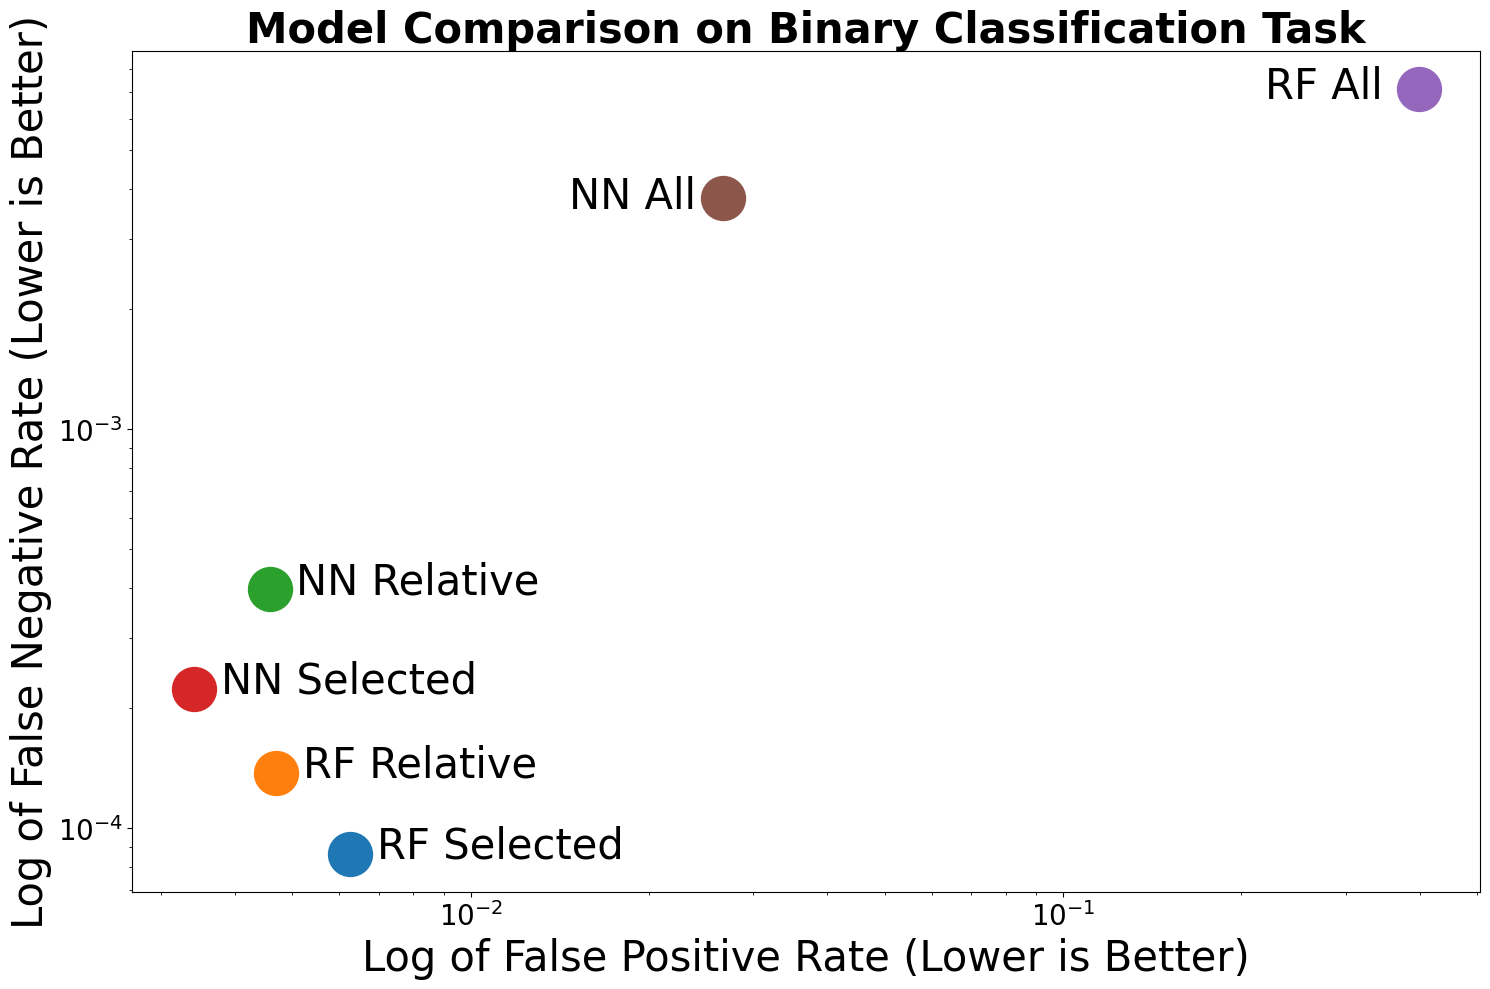

In [61]:
# Calculate False Positive and False Negative Rates
data["FPR"] = data["FalsePositives"] / (data["FalsePositives"] + data["True Negatives"])
data["FNR"] = data[" FalseNegatives"] / (data[" FalseNegatives"] + data["True Positives"])

# Define the ticks and tick labels for the log-log scale
ticks = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1e0]
tick_labels = [r'$10^{-5}$', '', r'$10^{-4}$', '', r'$10^{-3}$', '', r'$10^{-2}$', '', r'$10^{-1}$', '', r'$10^{0}$']

# Rename the models to shorter versions
rename_dict = {
    "nn-128-all-features-rel": "NN Relative",
    "nn-128-all-features": "NN All",
    "nn-128-selected-features": "NN Selected",
    "random-forest-128-all-features-rel": "RF Relative",
    "random-forest-128-all-features": "RF All",
    "random-forest-128-selected-features": "RF Selected"
}
data["ShortModelName"] = data["Model"].map(rename_dict)

# Define the new naming convention for the legend
legend_rename_dict = {
    "RF All": "Random Forest with all Features",
    "RF Relative": "Random Forest with Relative Features",
    "RF Selected": "Random Forest with Selected Features",
    "NN All": "Neural Network with all Features",
    "NN Relative": "Neural Network with Relative Features",
    "NN Selected": "Neural Network with Selected Features"
}

# Extract unique model names from both data and plot_data
unique_model_names_data = data["ShortModelName"].unique().tolist()

# Combine and deduplicate model names
all_model_names = list(set(unique_model_names_data))

custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Example colors
colors_dict = {model: custom_colors[i] for i, model in enumerate(all_model_names)}


plt.figure(figsize=(15, 10))

colors = plt.cm.viridis(np.linspace(0, 1, len(data)))
point_size = 100


for i, row in data.iterrows():
    model_color = colors_dict[row["ShortModelName"]]
    plt.scatter(row["FPR"], row["FNR"], color=model_color, s=point_size * 10, marker='o', label=legend_rename_dict[row["ShortModelName"]])
    
    # Adjust the position for the specified label
    if row["ShortModelName"] in ["NN Relative", "NN Selected", "RF Relative", "RF Selected"]:
        plt.text(row["FPR"] * 1.11, row["FNR"] * 1.05, row["ShortModelName"], fontsize=30, verticalalignment='center', horizontalalignment='left')
    elif row["ShortModelName"] in ["NN All", "RF All"]:
        plt.text(row["FPR"] * 0.55, row["FNR"] * 0.9, row["ShortModelName"], fontsize=30, verticalalignment='bottom', horizontalalignment='left')

plt.xticks(ticks, tick_labels, fontsize=20)  
plt.yticks(ticks, tick_labels, fontsize=20)  

plt.title("Model Comparison on Binary Classification Task", fontsize=30, fontweight='bold')  
plt.xlabel("Log of False Positive Rate (Lower is Better)", fontsize=30)  
plt.ylabel("Log of False Negative Rate (Lower is Better)", fontsize=30)  

plt.xscale("log")
plt.yscale("log")

# Hiding the grid
plt.grid(False)

# Showing all spines
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# Adding the adjusted legend box back
#legend = plt.legend(loc='lower right', fontsize=25, title='Models', bbox_to_anchor=(0.98, 0.03), borderaxespad=0., ncol=1)
#legend.get_title().set_fontsize(25)
#for handle in legend.legendHandles:
    #handle.set_sizes([300])

plt.tight_layout()
plt.show()

---

# Testing on 100 merger trees:

In [62]:
datasets = {
    "NN (Selected Features)": pd.read_csv("merger-trees/nn-128-selected-features.csv"),
    "RF (Selected Features)": pd.read_csv("merger-trees/random-forest-128-selected-features.csv"),
    "RF (All Features - Relative)": pd.read_csv("merger-trees/random-forest-128-all-features-rel.csv"),
    "NN (All Features - Relative)": pd.read_csv("merger-trees/nn-128-all-features-rel.csv")
}

In [63]:
# Drop the "Total Merger Events (Predicted)" column from each dataset
for data in datasets.values():
    data.drop("Total Merger Events (Predicted)", axis=1, inplace=True)

In [64]:
# Compute general metrics
def compute_metrics(data):
    mae_halos = (data['Total Halos (Predicted)'] - data['Total Halos (Real)']).abs().mean()
    tpr = data['True Positive'].sum() / data['Total Halos (Real)'].sum()
    fpr = data['False Positive'].sum() / data['Total Halos (Predicted)'].sum()
    merger_accuracy_data = data[data['Total Merger Events'].notna()]
    merger_accuracy = merger_accuracy_data['Successfully Predicted Merger Events'].sum() / merger_accuracy_data['Total Merger Events'].sum()
    return {
        'MAE (Halos)': mae_halos,
        'True Positive Rate': tpr,
        'False Positive Rate': fpr,
        'Merger Event Accuracy': merger_accuracy
    }

# Compute classification metrics
def compute_classification_metrics(data):
    accuracy = data['True Positive'].sum() / (data['True Positive'].sum() + data['False Positive'].sum() + data['False Negative'].sum())
    precision = data['True Positive'].sum() / (data['True Positive'].sum() + data['False Positive'].sum())
    recall = data['True Positive'].sum() / data['Total Halos (Real)'].sum()
    f1_score = 2 * precision * recall / (precision + recall)
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
    }

In [65]:
# Calculate metrics
metrics = {name: compute_metrics(data) for name, data in datasets.items()}
classification_metrics = {name: compute_classification_metrics(data) for name, data in datasets.items()}

# Create DataFrames
metrics_df = pd.DataFrame(metrics).transpose()
classification_metrics_df = pd.DataFrame(classification_metrics).transpose()

metrics_df.head()

,MAE (Halos),True Positive Rate,False Positive Rate,Merger Event Accuracy
NN (Selected Features),8.980000,0.973219,0.321592,0.974576
RF (Selected Features),9.425743,0.964018,0.335515,1.000000
RF (All Features - Relative),11.930000,0.966650,0.382505,0.950413
NN (All Features - Relative),23.170000,0.966650,0.553871,0.884615


In [66]:
classification_metrics_df.head()

,Accuracy,Precision,Recall,F1 Score
NN (Selected Features),0.665975,0.678408,0.973219,0.799502
RF (Selected Features),0.648403,0.664485,0.964018,0.786705
RF (All Features - Relative),0.604614,0.617495,0.966650,0.753595
NN (All Features - Relative),0.439366,0.446129,0.966650,0.610499


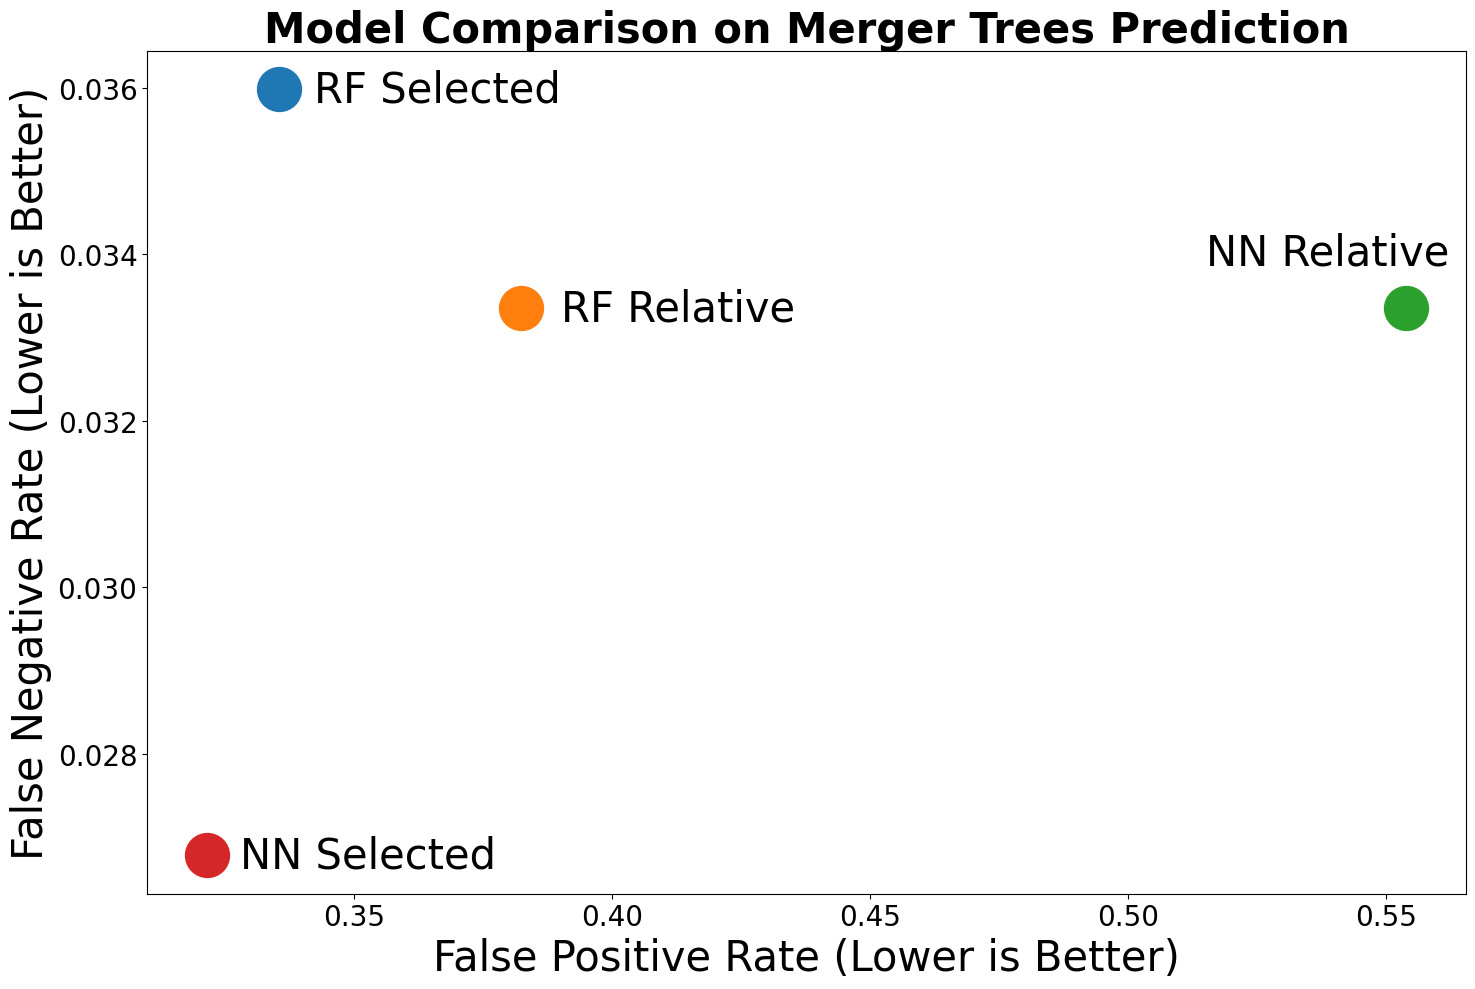

In [67]:
def compute_fnr(data):
    return data['False Negative'].sum() / data['Total Halos (Real)'].sum()

fnr = {name: compute_fnr(data) for name, data in datasets.items()}

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Model Name': list(datasets.keys()),
    'ShortModelName': ['NN Selected', 'RF Selected', 'RF Relative', 'NN Relative'],
    'FPR': [metrics_df.loc[name, 'False Positive Rate'] for name in datasets.keys()],
    'FNR': [fnr[name] for name in datasets.keys()]
})

# Define the legend rename dict (assuming the names provided in the code are consistent)
legend_rename_dict = {
    'NN Selected': 'NN (Selected Features)',
    'RF Selected': 'RF (Selected Features)',
    'RF Relative': 'RF (All Features - Relative)',
    'NN Relative': 'NN (All Features - Relative)'
}

plt.figure(figsize=(15, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(plot_data)))
point_size = 100

for i, row in plot_data.iterrows():
    model_color = colors_dict[row["ShortModelName"]]
    plt.scatter(row["FPR"], row["FNR"], color=model_color, s=point_size * 10, marker='o', label=legend_rename_dict[row["ShortModelName"]])
    
    # Adjust the position for the specified label
    if row["ShortModelName"] in ["NN Selected", "RF Relative", "RF Selected"]:
        plt.text(row["FPR"] * 1.02, row["FNR"] * 1, row["ShortModelName"], fontsize=30, verticalalignment='center', horizontalalignment='left')
    else:
        plt.text(row["FPR"] * 0.93, row["FNR"] * 1.02, row["ShortModelName"], fontsize=30, verticalalignment='center', horizontalalignment='left')
        

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Model Comparison on Merger Trees Prediction", fontsize=30, fontweight='bold')
plt.xlabel("False Positive Rate (Lower is Better)", fontsize=30)
plt.ylabel("False Negative Rate (Lower is Better)", fontsize=30)
plt.grid(False)

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

plt.tight_layout()
plt.show()

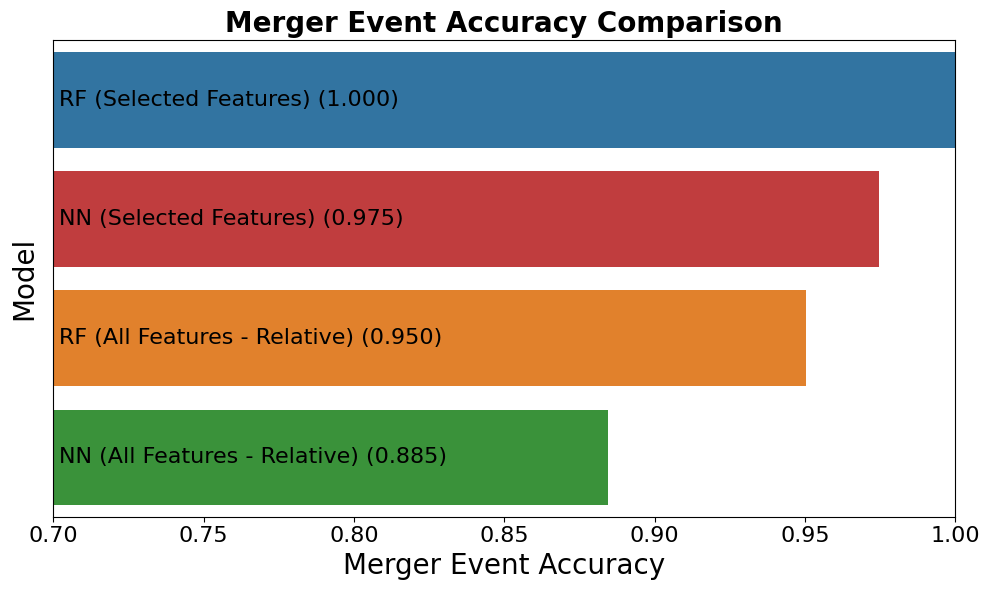

In [68]:
sorted_data_high_on_top = metrics_df.sort_values(by='Merger Event Accuracy', ascending=False)

reverse_legend_rename = {v: k for k, v in legend_rename_dict.items()}

# Now proceed with the plotting code
plt.figure(figsize=(10, 6))

# Use the reverse_legend_rename and colors_dict to create a color list in the order of sorted_data_high_on_top
color_list = [colors_dict[reverse_legend_rename[model]] for model in sorted_data_high_on_top.index]

bars = sns.barplot(y=sorted_data_high_on_top.index, x=sorted_data_high_on_top['Merger Event Accuracy'], palette=color_list, orient='h')
plt.title('Merger Event Accuracy Comparison', fontsize=20, fontweight='bold')
plt.xlabel('Merger Event Accuracy', fontsize=20)
plt.ylabel('Model', fontsize=20)
plt.xticks(fontsize=16)
plt.xlim(0.7, 1.0)  # Adjusted x-axis to not exceed 1

# Adding model labels to the left of the bars
for index, value in enumerate(sorted_data_high_on_top['Merger Event Accuracy']):
    bars.text(0.702, index, f'{sorted_data_high_on_top.index[index]} ({value:.3f})', color='black', ha="left", va="center", fontsize=16)

# Remove y-axis labels and ticks
bars.set(yticklabels=[])
bars.tick_params(left=False)

plt.tight_layout()
plt.show()

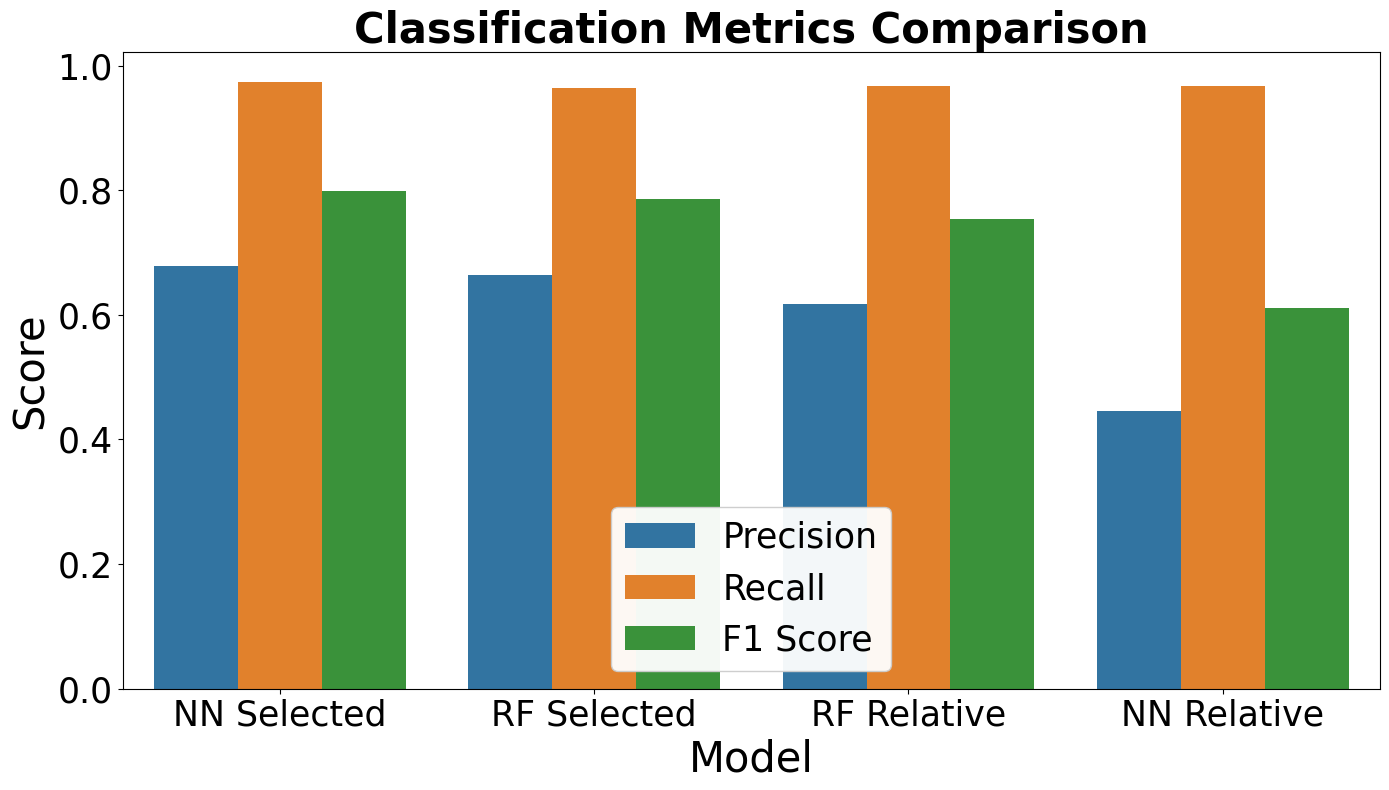

In [18]:
rename_dict = {
    'NN Selected': 'NN (Selected Features)',
    'RF Selected': 'RF (Selected Features)',
    'RF Relative': 'RF (All Features - Relative)',
    'NN Relative': 'NN (All Features - Relative)'
}
reverse_rename_dict = {v: k for k, v in rename_dict.items()}
metrics_to_plot_melted = classification_metrics_df[['Precision', 'Recall', 'F1 Score']].reset_index().melt(id_vars='index')
metrics_to_plot_melted['index'] = metrics_to_plot_melted['index'].replace(reverse_rename_dict)

plt.figure(figsize=(14, 8))
sns.barplot(x='index', y='value', hue='variable', data=metrics_to_plot_melted)
plt.title('Classification Metrics Comparison', fontsize=30, fontweight='bold')
plt.xlabel('Model', fontsize=30)
plt.ylabel('Score', fontsize=30)
plt.xticks(rotation=0, fontsize=25)  # Setting rotation to 0 for x-ticks
plt.yticks(fontsize=25)
legend = plt.legend(fontsize=25, title_fontsize=25, loc='lower center')
legend.get_frame().set_alpha(0.95)
plt.tight_layout()
plt.show()